# **Automatidata Project**
**Data provided as part of the Google Advanced Data Analytics Certification (Offered Through Coursera)**

**Scenario**:  A ficitious data consulting firm, Automatidata, has been hired by the New York City Taxi and Limousine Commission (TLC) to develop a regression model that helps estimate taxi fares before the ride. Required deliverables include:
> - Inspection of the dataset before analysis begins
> - Determination of what the TLC data provides by using exploratory data analysis (EDA)
> - Development of a machine learning model
>> - Testing of the model to assure the model is delivering consistent results
> - Determine whether or not the model meets project requirements

### Inspection and Understanding of the data

In [1]:
# Import necessary libraries and packages:

import pandas as pd
import numpy as np

In [2]:
# Load the dataset into a dataframe:

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
# Display the first few lines of the dataframe to understand the organization:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Since it's unclear what some of the column names mean, clarification was obtained from the TLC:<br>
**Unnamed: 0**: Unique trip identification number<br>
**VendorID**: Code indicating the Taxi Technology Service Provider (TPEP) system installed in the cab<br>
> 1 = Creative Mobile Technologies, LLC<br>
> 2 = VeriFone Inc<br>

**tpep_pickup_datetime**: The date and time when the meter was engaged<br>
**tpep_dropoff_datetime**: The data and time when the meter was disengaged<br>
**passenger_count**: The number of passengers in the vehicle (driver-entered value)<br>
**trip_distance**: Elapsed trip distance in miles<br>
**RatecodeID**: The final rate code in effect at the end of the trip<br>
> 1 = Standard rate<br>
> 2 = JFK<br>
> 3 = Newark<br>
> 4 = Nassau or Westchester<br>
> 5 = Negotiated Fare<br>
> 6 = Group Ride<br>

**store_and_fwd_flag**: Indicates whether the trip record was held in vehicle memory before being sent to the vendor because the vehicle did not have a connection to the server<br>
> Y = store and forward trip<br>
> N = not a store and forward trip<br>

**PULocationID**: TLC taxi zone in which the taxi meter was engaged<br>
**DOLocationID**: TLC taxi zone in which the taxi meter was disengaged<br>
**payment_type**: Numeric code signifying how the trip was paid for<br>
> 1 = credit card<br>
> 2 = cash<br>
> 3 = no charge<br>
> 4 = dispute<br>
> 5 = unknown<br>
> 6 = voided trip<br>

**fare amount**: the time and distance fare calculated by the taxi meter<br>
**extra**: other surcharges, only includes the \\$0.50 and \\$1 rush hour and overnight charges<br>
**mta_tax**: \\$0.50 tax that is automatically triggered based on the metered rate in use<br>
**improvement_surcharge**: \\$0.30 improvement surcharge assessed on trips at the flag drop<br>
**tip_amount**: tip amount. Automatically populated for credit card tips. Does not include cash tips<br>
**tolls_amount**: total amount of all tolls paid in trip<br>
**total_amount**: total amount charged to passengers, not including cash tips

In [4]:
# Determine data types and check for any missing entries:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Observations:<br>
1. Given that the goal of the project is development of a model to estimate fares before a ride, many of the variables will not be necessary to achieve this goal.
2. There are no null values in this dataset which will make preparation and analysis easier
3. The tpep_pickup_datetime and tpep_dropoff_datetime columns are currently in object (string) datatype format. These will most likely need to be converted to datetime should these variables be needed for the model.

In [5]:
# Obtain summary statistics about the dataframe:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Observations:<br>
1. The minimum **trip_distance** is 0 which could potentially be erroneous. Although the max **trip_distance** is nearly 34 miles, which seems long for a taxi ride, it's probably not unreasonable.
2. The minimum **fare_amount** is \\$-120 and the max is \\$999.99. While a negative fare amount is impossible, the max amount listed is far above the average of $13 and should be investigated.
3. The **extra**, **mta_tax** and **improvement_surcharge** columns have negative minimum values. Since these affect the amount. in the **total_amount** column which could be necessary for the project goal, these negative values should be investigated.
4. The max **tip_amount** is \\$200 which is extremely high compared to the average of \\$2.8, and an unusual amount for a tip.
5. The max **tolls_amount** is \\$19.1 compared to the average of \\$1.4. This high value may not be an outlier however depending on the nature/length/route of the trip.
6. The min and max **total_amount** are clearly being affected by the **fare_amount** and **tip_amount** outliers (and possibly the potential **tolls_amount** max outlier).


### Variable Investigation
Since **trip_distance** and **total_amount** are, at first glance, most related to fare prediction before a ride occurs, these variables can be investigated first.

In [6]:
# First, sort trip_distance from max to min to see if the max trip distance discovered above is an outlier

trip_distance_sort = df.sort_values(by = 'trip_distance', ascending = False)
trip_distance_sort.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


Although the max trip distance seems large for a taxi ride, the next nine rides are also long, so this is definitely not an outlier. Additionally, it appears that trip distance and total fare are not correlated--this will be worth investigating/understanding.

In [7]:
# Next, sort total fare amount from maximum to minium
total_amount_sort_top = df.sort_values(by = 'total_amount', ascending = False)
total_amount_sort_top.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


After the very high total amount of \\$1200, the next highest amount is \\$450.30. Although this still seems very high for a taxi fare, there are at least 8 other total fares above \\$100, making the \\$450 fare appear to be valid. However, the \\$1200 total fare still appears to be suspect.

In [8]:
# Check for negative total fares by sorting from minimum to maximum
total_amount_sort_bottom = df.sort_values(by = 'total_amount')
total_amount_sort_bottom.head(15)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


There are 14 entries in the dataset that have negative total amounts. These appear to be a result of recorded negative fare, negative values in the **extra** column, negative values in the **mta_tax** column and negative values in the **improvement_surcharge** column. These entries will have to somehow be accounted for or dropped for the final model.

In [9]:
# Looking at total_amount_sort_bottom, the negative total_amounts have payment methods 3 and 4 associated with the data. 
# Sort the data to see how many of each payment type are represented in the data:

df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

From the data dictionary, 1 = credit card, 2 = cash, 3 = no charge and 4 = dispute. So the negative values reults from either "no charge" or "dispute." This probably means that these entries can be excluded from the final model since they aren't representative of actual fares.

In [10]:
# Does the vendor (TPEP system) have any effect on total fare amount?
# How many times is each vendor ID represented in the table?
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

This shows that there are about 2600 more entries from TPEP devices made by vendor 2 (VeriFone Inc)--approximately 20% more. Does this translate to different mean total fares?

In [11]:
# What is the mean total amount for each vendor?
df.groupby('VendorID')['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

The results above show no significant difference in mean total fares between the two TPEP devices in TLC taxis.

In [12]:
# Does passenger count have an effect on tip amount/total fare amount?
# Tips are only recorded for credit card payments so the data must first be filtered for credit card payments only
mask = df['payment_type'] == 1
data_cc_filter = df[mask]

# Filter data_cc_filter for passenger count only
data_cc_filter['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

Note here that there are significantly more single (1) passenger rides than others, and 27 entries have 0 passengers, which seems unusual.

In [13]:
# Calculate the average tip amount for each passenger count
data_cc_filter.groupby(['passenger_count']).mean()['tip_amount']

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

The mean tip amount does not appear to be dependent on the number of passengers per ride.

### Exploratory Data Analysis (EDA)

The goal of this section is to perform futher data exploration and cleaning as well as build visualizations to better understand the data. Data has been assessed in the previous section and the most applicable variables have been selected.

In [14]:
# Visualization libraries seaborn and matplotlib as well as the datetime library need to be loaded:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [15]:
# In order to work with the tpep_pickup_datetime and tpep_dropoff_datetime columns, the data must be converted to datetime format:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

First, an outlier check will be performed for relevant variables such as trip distance, total amount (including the variables that go into the total amount calculation) and trip duration (determined from from the datetime conversion of the pickup and dropoff variables).

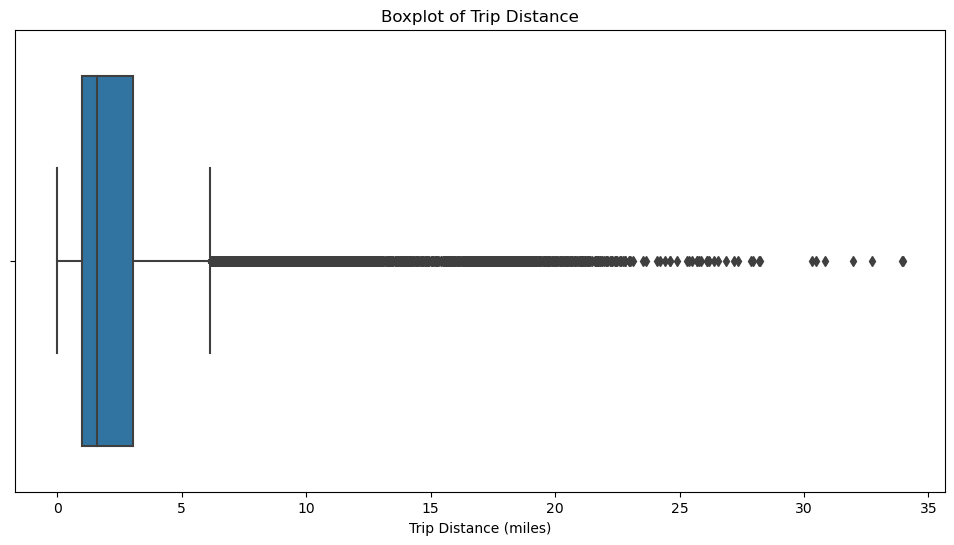

In [16]:
# Create a boxplot of trip_distance
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

From the boxplot above, the highest distribution of trips are below about 6 miles, with outliers out to nearly 35 miles.

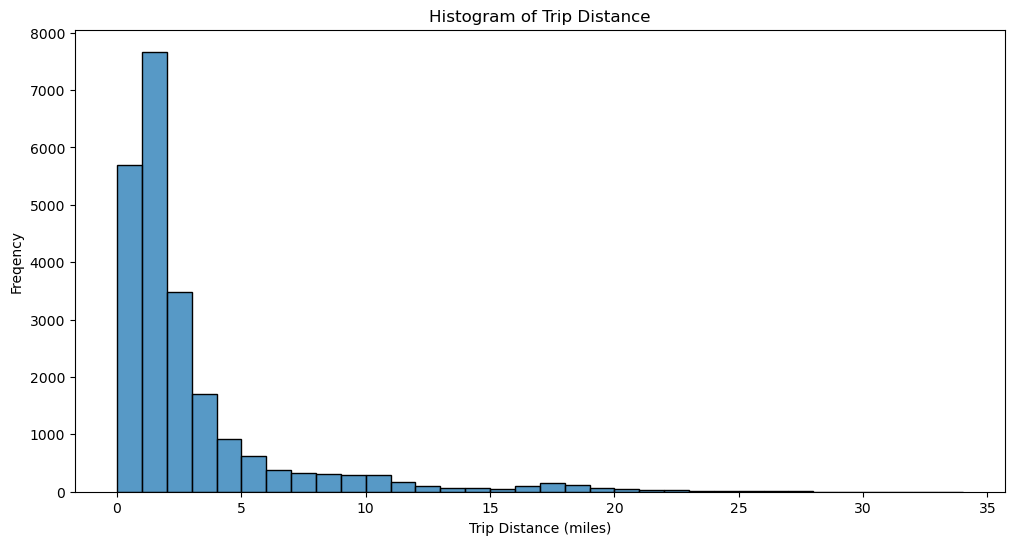

In [17]:
# Create a histogram of trip_distance
plt.figure(figsize = (12,6))
sns.histplot(df['trip_distance'], bins = range(0,35,1))
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Freqency')
plt.show()

Most trips fall below a distance of 2 miles and tail off as the distance increases beyond 2 miles.

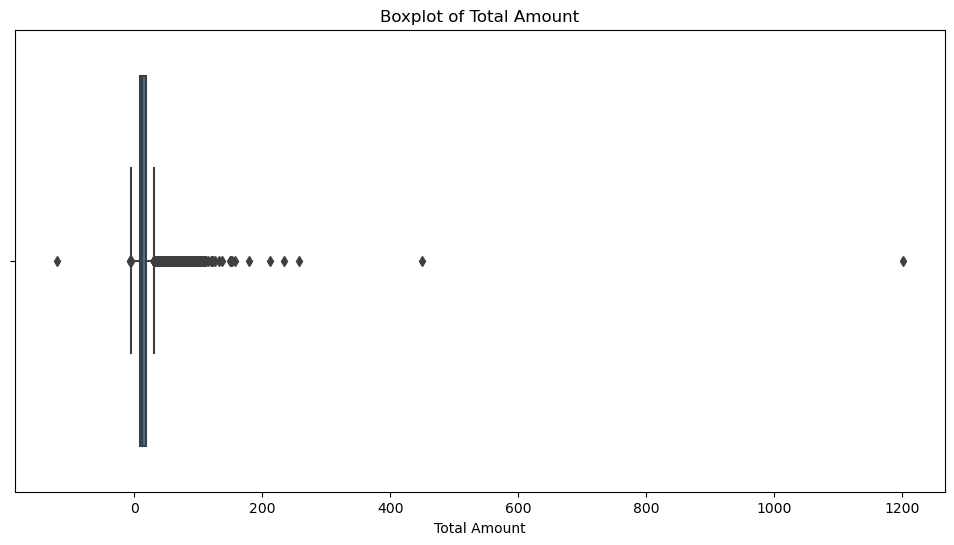

In [18]:
# Create a boxplot of total_amount
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

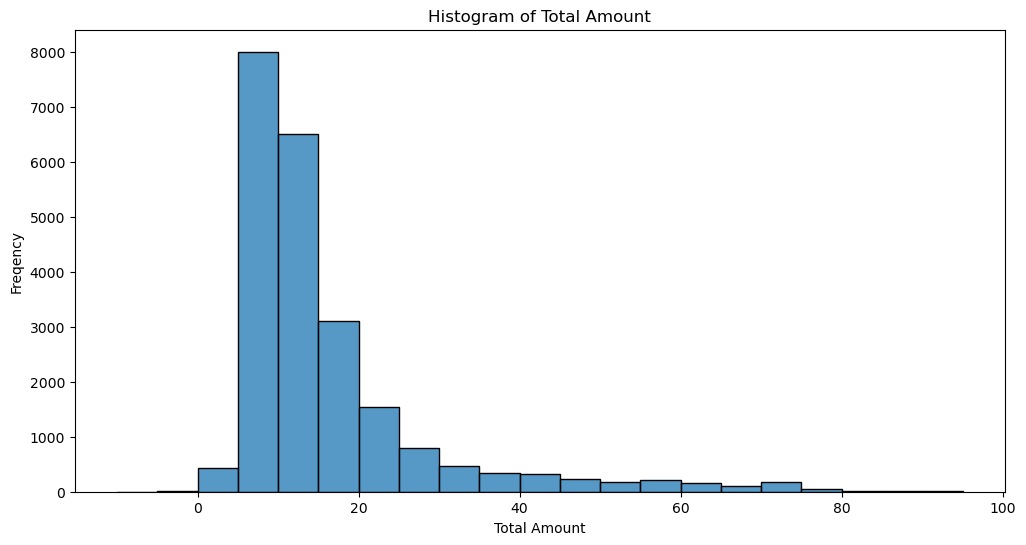

In [19]:
# Create a histogram of total_amount
plt.figure(figsize = (12,6))
sns.histplot(df['total_amount'], bins = range(-10,100,5))
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Freqency')
plt.show()

Both the boxplot and histogram show the majority of total taxi fare to be in the \\$5 to \\$15 range. The boxplot clearly shows the negative and very high total fare outliers. The total cost of each trip has a right-skewed distribution, mirroring the distribution of trip distance.

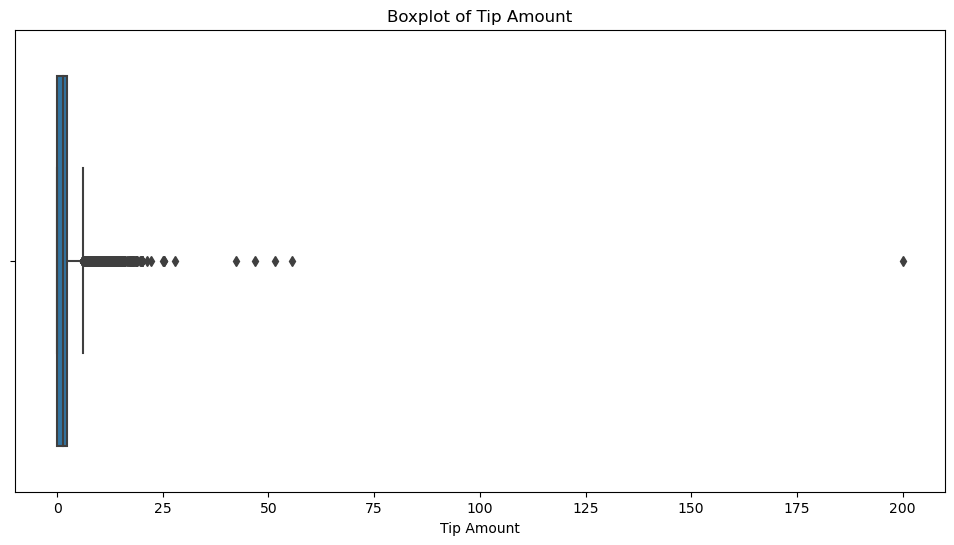

In [20]:
# Create a boxplot of tip_amount
plt.figure(figsize = (12,6))
sns.boxplot(data = None, x = df['tip_amount'])
plt.title('Boxplot of Tip Amount')
plt.xlabel('Tip Amount')
plt.show()

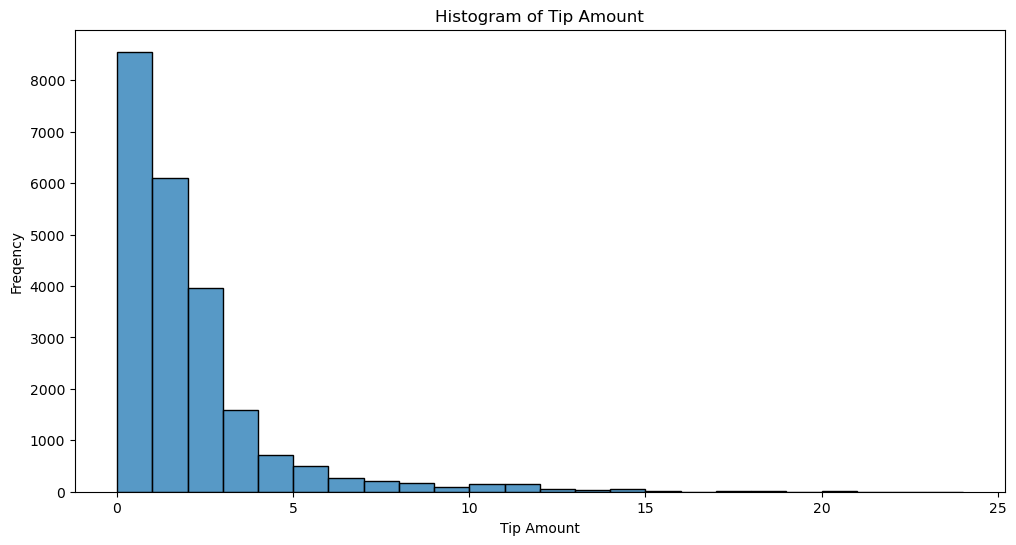

In [21]:
# Create a histogram of tip_amount
plt.figure(figsize = (12,6))
sns.histplot(df['tip_amount'], bins = range(0,25,1))
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.show()

Both the boxplot and histogram show the majority of tips to be in the \\$0 to \\$3 range. The boxplot clearly shows the high tip outlier around \\$200. Like trip distance and total fare, the tip amount shows a right-skewed distribution.

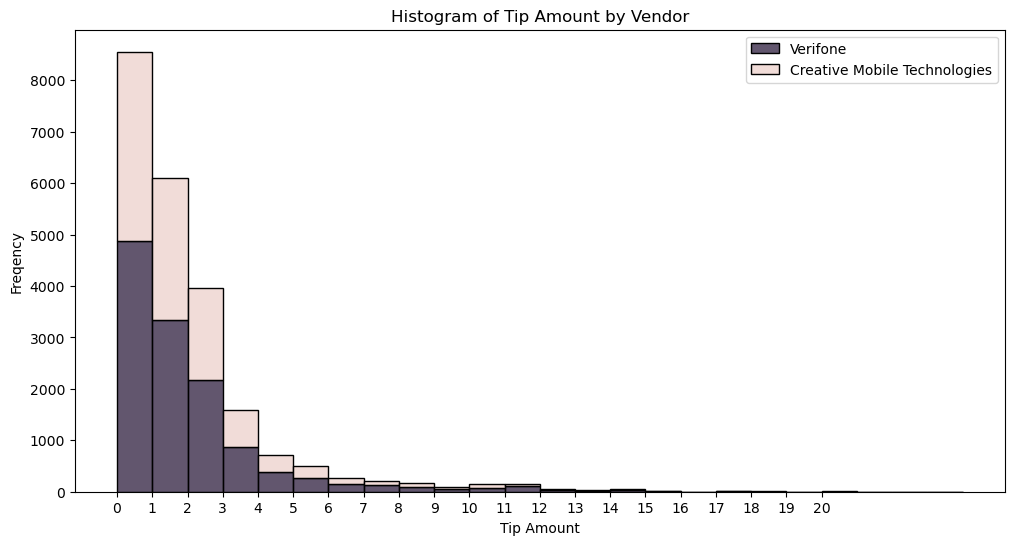

In [22]:
# Create a histogram of tip_amount by vendor to check for any discrepancy
plt.figure(figsize = (12,6))
ax = sns.histplot(data = df,
             x = 'tip_amount',
             bins = range(0,25,1),
             hue = 'VendorID',
             multiple = 'stack')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.legend(labels = ['Verifone', 'Creative Mobile Technologies'])
plt.show()

Although earlier analysis showed Verifone has a slightly higher share of rides, separation of tip amount by vendor shows that the proportion of tip amount between the two vendors is maintained. Therefore, there are no significant differences in tip distribution between the two vendors. 

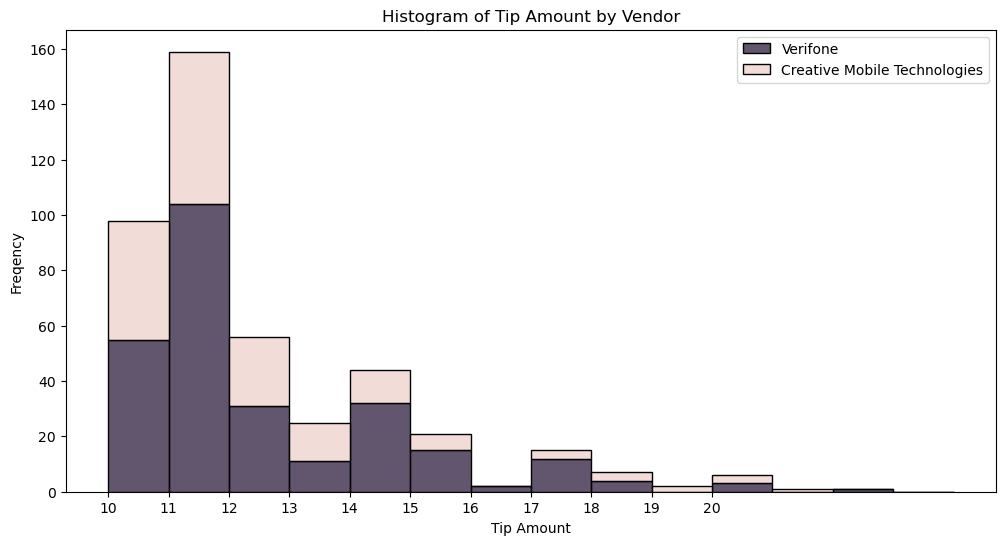

In [24]:
# It is worth checking to see if this proportion is maintained at higher tip
# amounts. Create a histogram of tip_amount by vendor for tips > $10:
tips_over_ten = df[df['tip_amount'] > 10]

plt.figure(figsize = (12,6))
ax = sns.histplot(data = tips_over_ten,
             x = 'tip_amount',
             bins = range(10,25,1),
             hue = 'VendorID',
             multiple = 'stack')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Freqency')
plt.legend(labels = ['Verifone', 'Creative Mobile Technologies'])
plt.show()

Proportions of tip amount by TPEP vendor are generally maintained above \\$10, with some exception about \\$14, however the sample size at this level is very low and therefore can probably be disregarded.

In [25]:
# Revisit tips by passenger count to visually plot any differences.
# First reexamine the number of rides per number of passengers:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Again, nearly two thirds of rides had only one passenger. There are 33 rides with 0 passengers which can most likely be dropped from the model data unless a reasonable explanation is found.

<Figure size 1200x600 with 0 Axes>

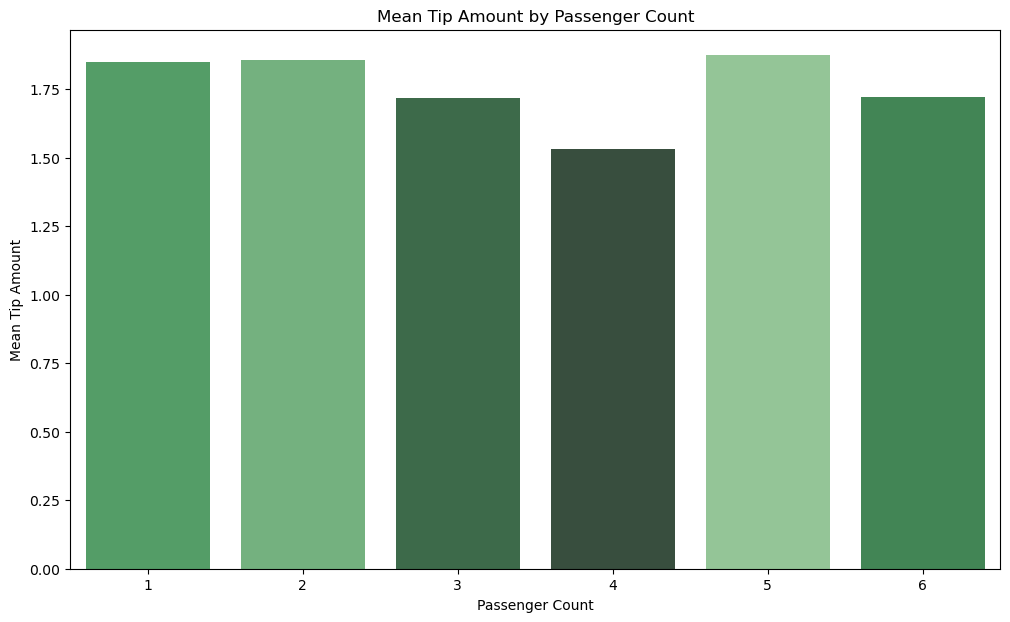

In [37]:
# Calculate mean tips per passenger and create a bar plot to visualize, omitting 
# data for 0 passengers
mean_tips = df.groupby(['passenger_count']).mean()[['tip_amount']]

plt.figure(figsize = (12,6))
data = mean_tips.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')
plt.title('Mean Tip Amount by Passenger Count')
plt.show()

Mean tip values show little dependence on the number of passengers, with some possible exception for 4 riders, though this may be due to the smaller number of 4 passenger rides compared to others (and not including 0 passengers).

In [34]:
# Investigate the data based on time. Datetime conversions were done earlier.
# Create month and day columns for pickup data:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [35]:
# Determine the total number of rides for each month:
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [36]:
# The months are out of order so need to reorder the list:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

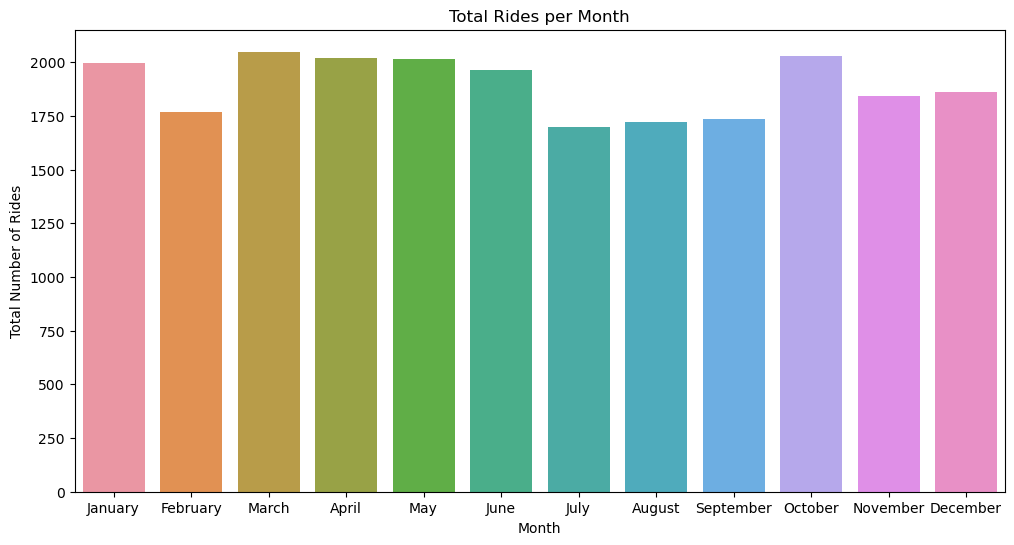

In [39]:
# Create a bar plot of the total number of rides per month:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = monthly_rides.index,
                 y = monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Rides')
plt.show()

The data show that monthly ride totals are fairly consistent, with notable dips in February, July, September and October.

In [42]:
# Plot ride count by day:
daily_rides = df['day'].value_counts()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Name: day, dtype: int64

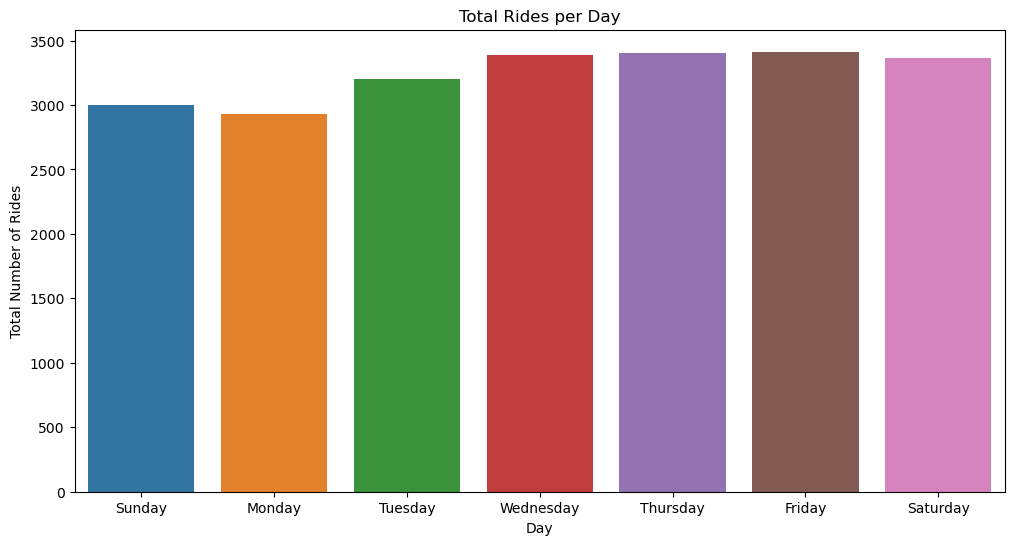

In [43]:
# Create a bar plot for the total number of rides per day:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = daily_rides.index,
                 y = daily_rides)
ax.set_xticklabels(day_order)
plt.title('Total Rides per Day')
plt.xlabel('Day')
plt.ylabel('Total Number of Rides')
plt.show()

According to the plot above, rides on Wednesday through Saturday are consistent and greater than rides on Sunday through Tuesday.

In [46]:
# Explore monthly and daily revenue
# First, monthly total revenue:
monthly_revenue = df.groupby('month').sum()[['total_amount']]
monthly_revenue = monthly_revenue.reindex(index = month_order)
monthly_revenue

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


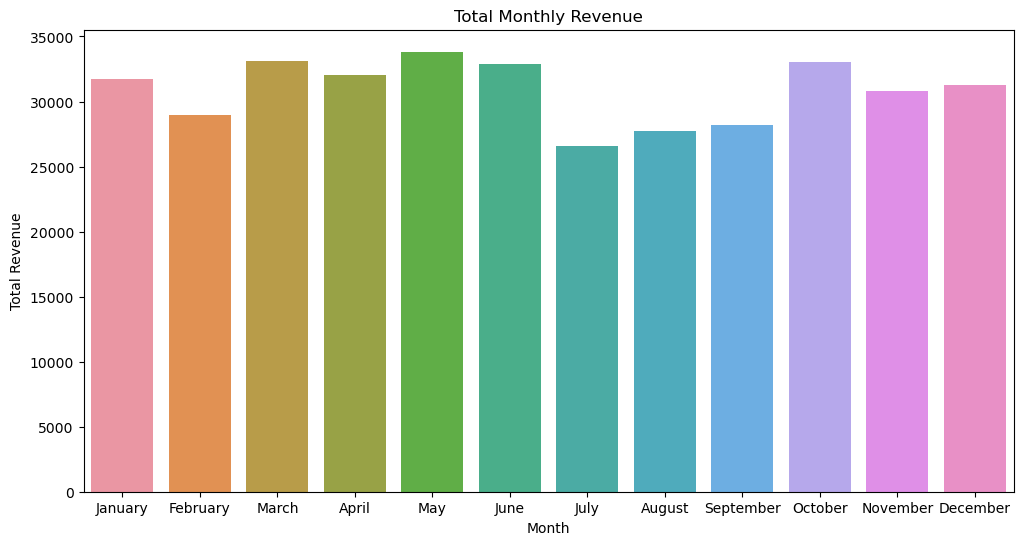

In [49]:
# Create a bar plot of total monthly revenue:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = monthly_revenue.index,
                 y = monthly_revenue['total_amount'])
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Total monthly revenue appears to follow the same trend as total monthly rides.

In [50]:
# Create a bar plot of total daily revenue
daily_revenue = df.groupby('day').sum()[['total_amount']]
daily_revenue = daily_revenue.reindex(index = day_order)
daily_revenue

,total_amount
day,
Sunday,48624.06
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40


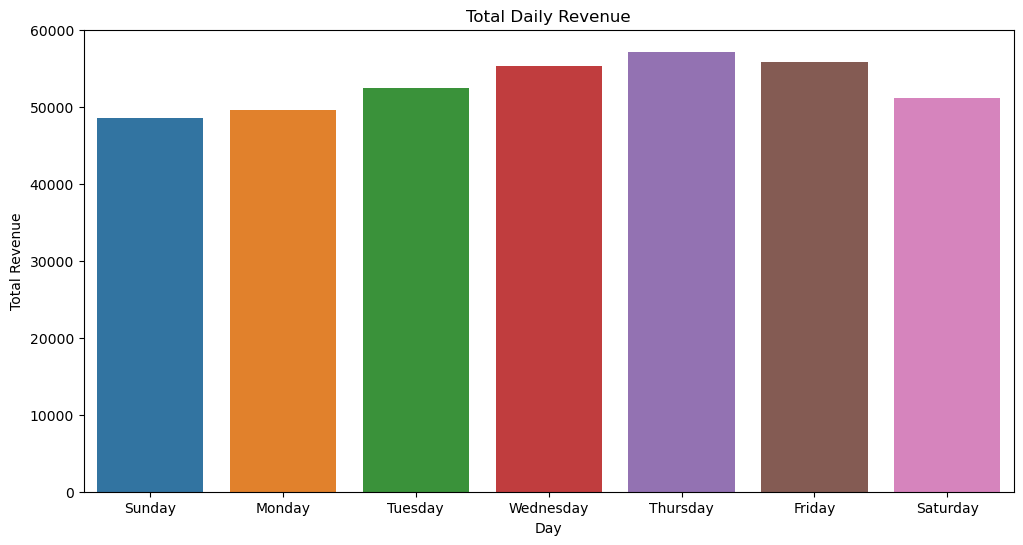

In [51]:
# Create a bar plot of total daily revenue:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = daily_revenue.index,
                 y = daily_revenue['total_amount'])
plt.title('Total Daily Revenue')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.show()

According to the plot above, Thursday had the highest revenue, whereas the weekend days had the least. It is worth noting that Saturday had 35 fewer rides than Thursday, but Saturday's revenue is about \\$6000 less than Thursday (a more than 10% difference).

In [53]:
# Finally, it would be worth adding a trip_duration column which could
# potentially be useful for the final model:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


Adding the trip_duration column can ultimately help to understand other potentially important information such as the relationship between total fare and trip duration, or trip duration and total distance.

### Key Findings

1. There are no missing values in the dataset
2. The highest distribution of trip distances are below 5 miles. The minimum **trip_distance** is 0 which could potentially be erroneous and needs to be better understood. 
3. The highest distribution of **total_fare** is between about \\$5 and \\$15 with some very high outliers that need investigated.
4. The minimum **fare_amount** is \\$-120 and the max is \\$999.99. While a negative fare amount is impossible, the max amount listed is far above the average of $13 and should be investigated.
5. The max **tip_amount** is \\$200 which is extremely high compared to the average of \\$2.8, and an unusual amount for a tip. Tip amounts generally are not affected by TPEP device or passenger count.
